In [2]:
import pandas as pd

df = pd.read_pickle('preprocesseddf.pkl')
df.head()

,productAsin,country,date,isVerified,ratingScore,reviewUrl,reviewedIn,variant,variantAsin,reviews
0,B09G9BL5CP,India,11-08-2024,True,4,https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,charger every thing good iphones nothing compa...
1,B09G9BL5CP,India,16-08-2024,True,5,https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,iphone gb look fabulous android user switched ...
2,B09G9BL5CP,India,14-05-2024,True,4,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,flip camera option nill tried flip camera reco...
3,B09G9BL5CP,India,24-06-2024,True,5,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,product genuine
4,B09G9BL5CP,India,18-05-2024,True,5,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,good product happy get iphone amazon offer


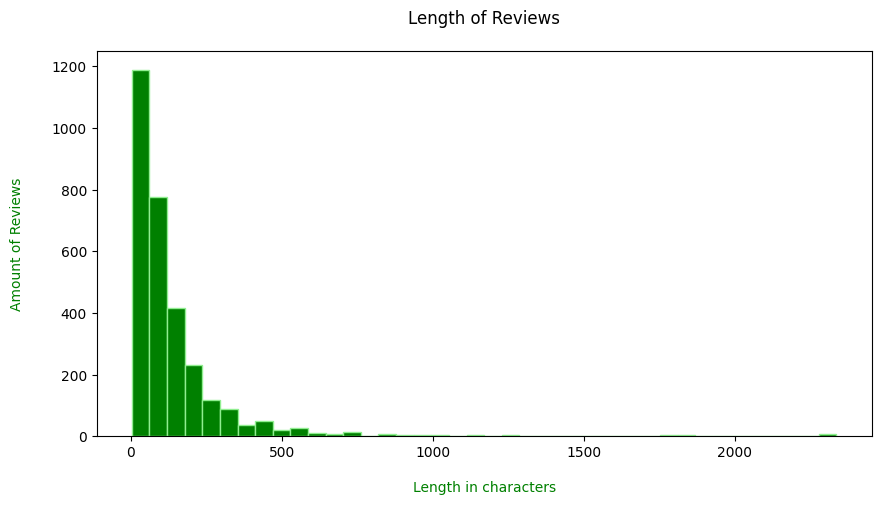

In [6]:
import matplotlib.pyplot as plt


df["length"] = df["reviews"].astype(str).apply(len)
     

df["length"].plot(kind = "hist", bins = 40, edgecolor = "lightgreen", linewidth = 1, color = "green", figsize = (10,5))
plt.title("Length of Reviews", color = "black", pad = 20)
plt.xlabel("Length in characters", labelpad = 15, color = "green")
plt.ylabel("Amount of Reviews", labelpad = 20, color = "green")

plt.show()

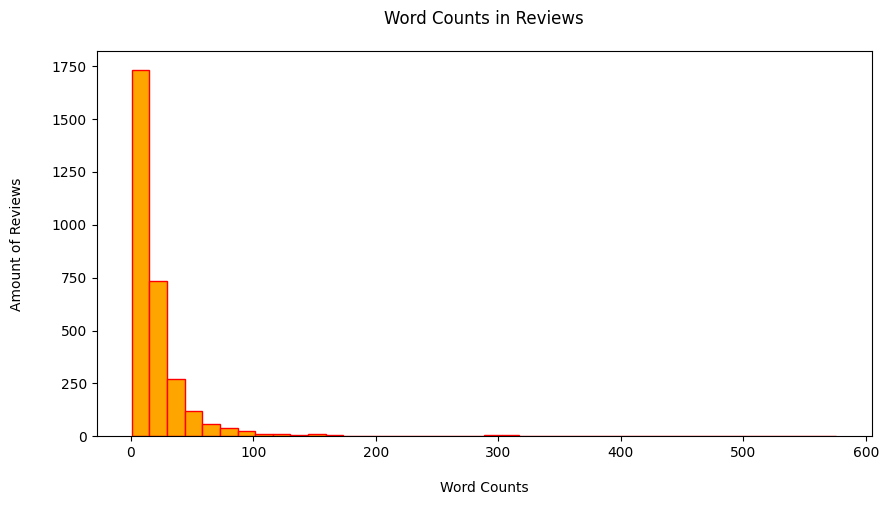

In [8]:

df["word_counts"] = df["reviews"].apply(lambda x: len(str(x).split()))
     
df["word_counts"].plot(kind = "hist", bins = 40, edgecolor = "red", linewidth = 1, color = "orange", figsize = (10,5))
plt.title("Word Counts in Reviews", color = "black", pad = 20)
plt.xlabel("Word Counts", labelpad = 15, color = "black")
plt.ylabel("Amount of Reviews", labelpad = 20, color = "black")

plt.show()

In [17]:
# Text Polarity
from textblob import TextBlob
# Text Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
# Word Cloud
from wordcloud import WordCloud

def Gram_Analysis(Corpus, Gram, N):
  # Vectorizer
  Vectorizer = CountVectorizer(ngram_range=(Gram,Gram))

  # N-Grams Matrix
  ngrams = Vectorizer.fit_transform(Corpus)

  # N-Grams Frequency
  Count = ngrams.sum(axis=0)

  # List of Words
  words = [(word, Count[0, idx]) for word, idx in Vectorizer.vocabulary_.items()]

  # Sort Descending With Key = Count
  words = sorted(words, key = lambda x:x[1], reverse = True)

  return words[:N]

In [18]:
# Use dropna() so the base DataFrame is not affected
Positive = df[df["ratingScore"] > 3].dropna()
Neutral = df[df["ratingScore"] == 3].dropna()
Negative = df[df["ratingScore"] <3].dropna()

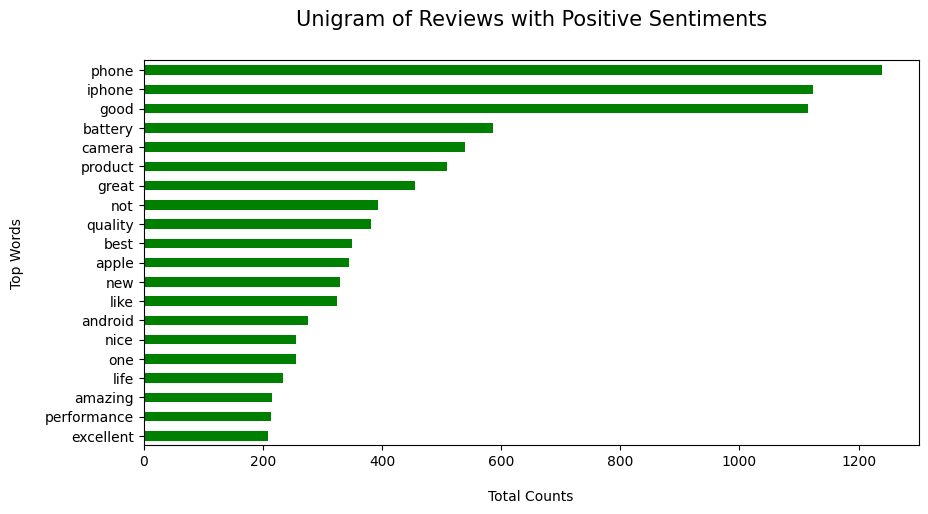

In [20]:
# Finding Unigram
words = Gram_Analysis(Positive["reviews"], 1, 20)
Unigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Unigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "green", figsize = (10, 5))
plt.title("Unigram of Reviews with Positive Sentiments", loc = "center", fontsize = 15, color = "black", pad = 25)
plt.xlabel("Total Counts", color = "black", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "black", fontsize = 10, labelpad = 15)
plt.show()

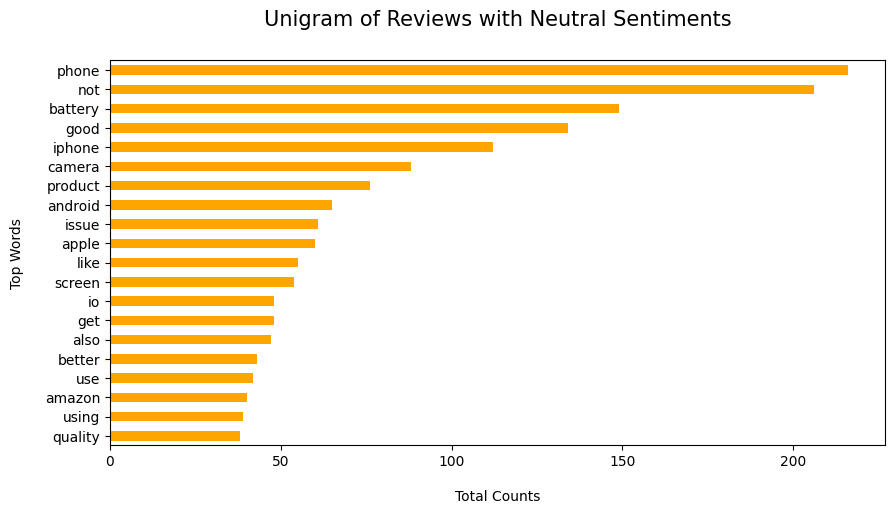

In [21]:
# Finding Unigram
words = Gram_Analysis(Neutral["reviews"], 1, 20)
Unigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Unigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "orange", figsize = (10, 5))
plt.title("Unigram of Reviews with Neutral Sentiments", loc = "center", fontsize = 15, color = "black", pad = 25)
plt.xlabel("Total Counts", color = "black", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "black", fontsize = 10, labelpad = 15)
plt.show()

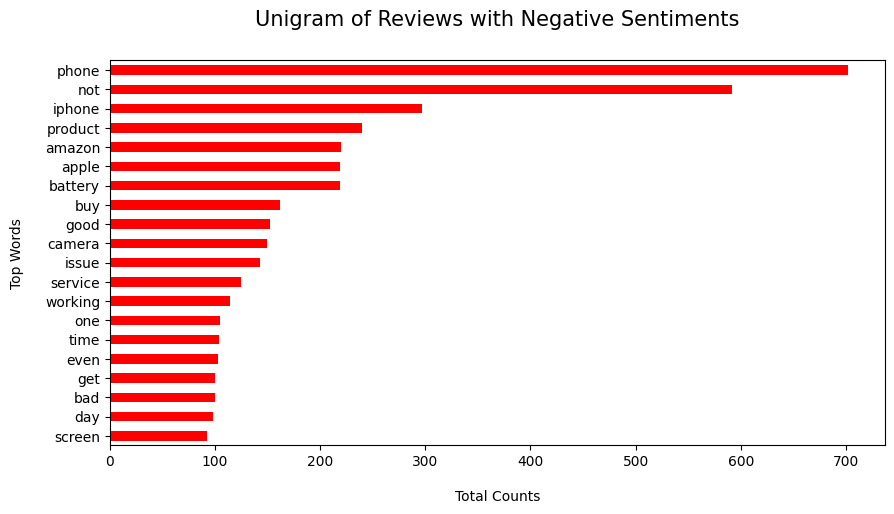

In [22]:
# Finding Unigram
words = Gram_Analysis(Negative["reviews"], 1, 20)
Unigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Unigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "red", figsize = (10, 5))
plt.title("Unigram of Reviews with Negative Sentiments", loc = "center", fontsize = 15, color = "black", pad = 25)
plt.xlabel("Total Counts", color = "black", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "black", fontsize = 10, labelpad = 15)
plt.show()

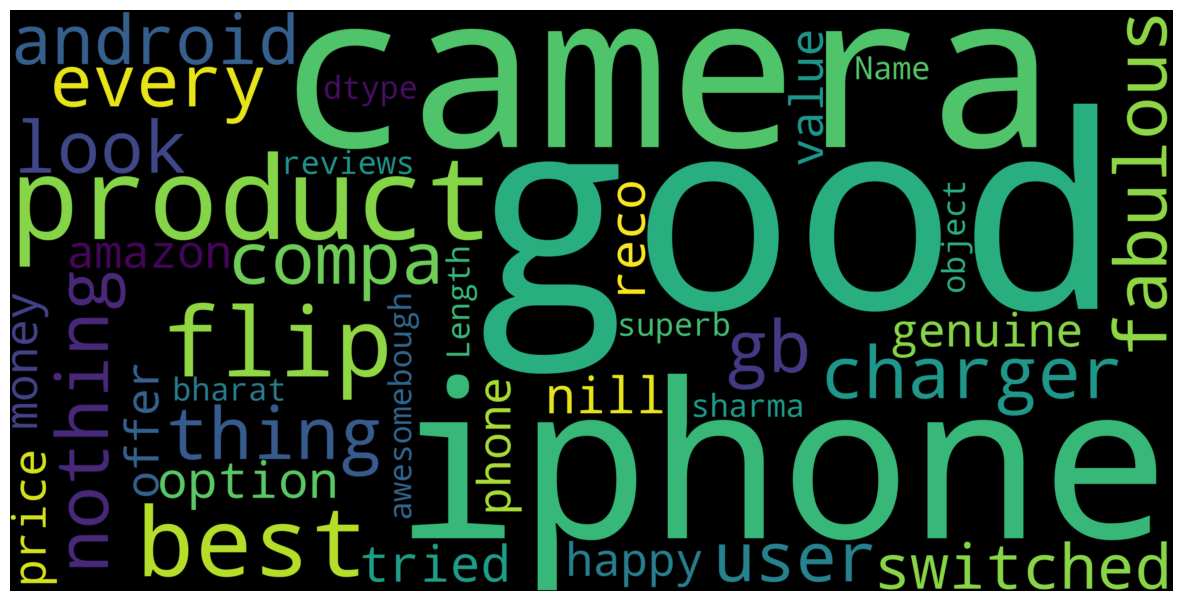

In [25]:
wordCloud = WordCloud(max_words = 50, width = 3000, height = 1500).generate(str(Positive["reviews"]))
plt.figure(figsize = (15, 15))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

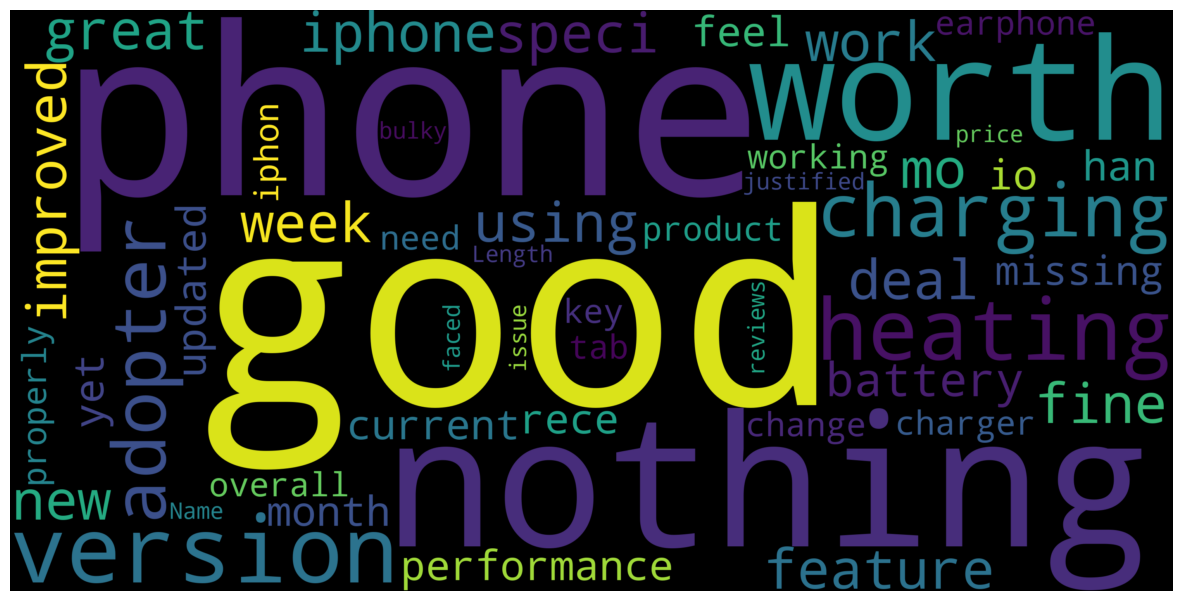

In [26]:
wordCloud = WordCloud(max_words = 50, width = 3000, height = 1500).generate(str(Neutral["reviews"]))
plt.figure(figsize = (15, 15))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

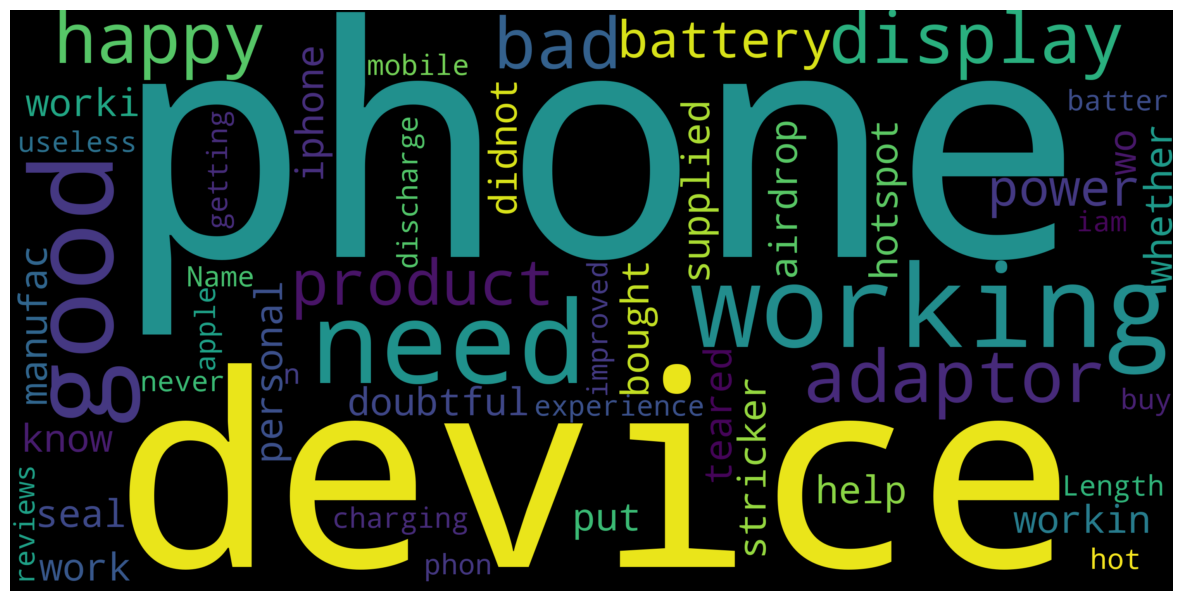

In [27]:
wordCloud = WordCloud(max_words = 50, width = 3000, height = 1500).generate(str(Negative["reviews"]))
plt.figure(figsize = (15, 15))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()